# The input of the image

In [5]:
(s1, r1), (s2, r2) = (90, 0), (138, 255)

In [6]:
import cv2 # for image manipulation
from util import show_img
import math

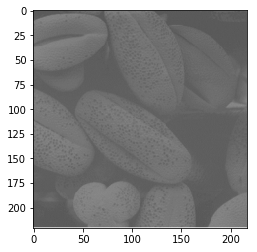

In [7]:
img = cv2.imread('shell.png')

# as opencv loads in BGR format by default, we want to show it in RGB.
show_img(img)

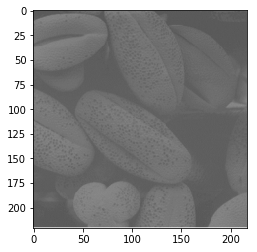

In [8]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_img(img_gray)

In [9]:
def peice_wise_line_func_wall(s):
    if 28 <= s <= 75:
        r = (227 * s - 5040)/47
    else:
        r = s
    return r

In [10]:
def peice_wise_line_func_shell(s):
    if s < 90:
        r = 0
    elif s <= 138:
        r = (255 * s - 22950)/48
    else:
        r = 255
    return r

In [11]:
img_cont = img_gray.copy()
for i in range(img_cont.shape[0]):
    for j in range(img_cont.shape[1]):
        intensity = img_cont[i, j]
        img_cont[i, j] = peice_wise_line_func_shell(intensity)

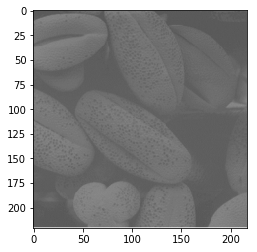

In [12]:
show_img(img_gray)

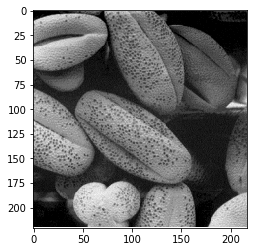

In [13]:
show_img(img_cont)

# Gamma Transformation

In [29]:
gamma = 1.5

In [30]:
def apply_gamma(s, gamma=1, k=1):
    if gamma == 0:
        return 1
    val = s/255
    val = k * math.pow(val, gamma)
    if val < 0:
        val = 0
    elif val > 1:
        val = 1
    r = val * 255
    return int(r)

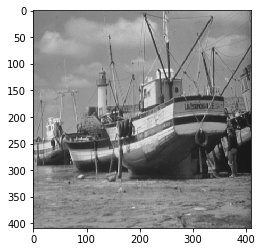

In [31]:
img = cv2.imread('ship.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_img(img_gray)

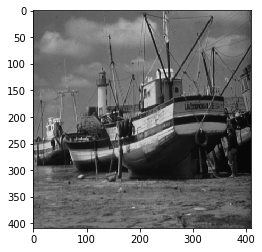

In [32]:
img_cont = img_gray.copy()
for i in range(img_cont.shape[0]):
    for j in range(img_cont.shape[1]):
        intensity = img_cont[i, j]
        img_cont[i, j] = apply_gamma(intensity, gamma)
        
show_img(img_cont)